In [1]:
!pip install tensorflow_hub

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import os
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
labels_csv = pd.read_csv("/kaggle/input/dpl-project-1-dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


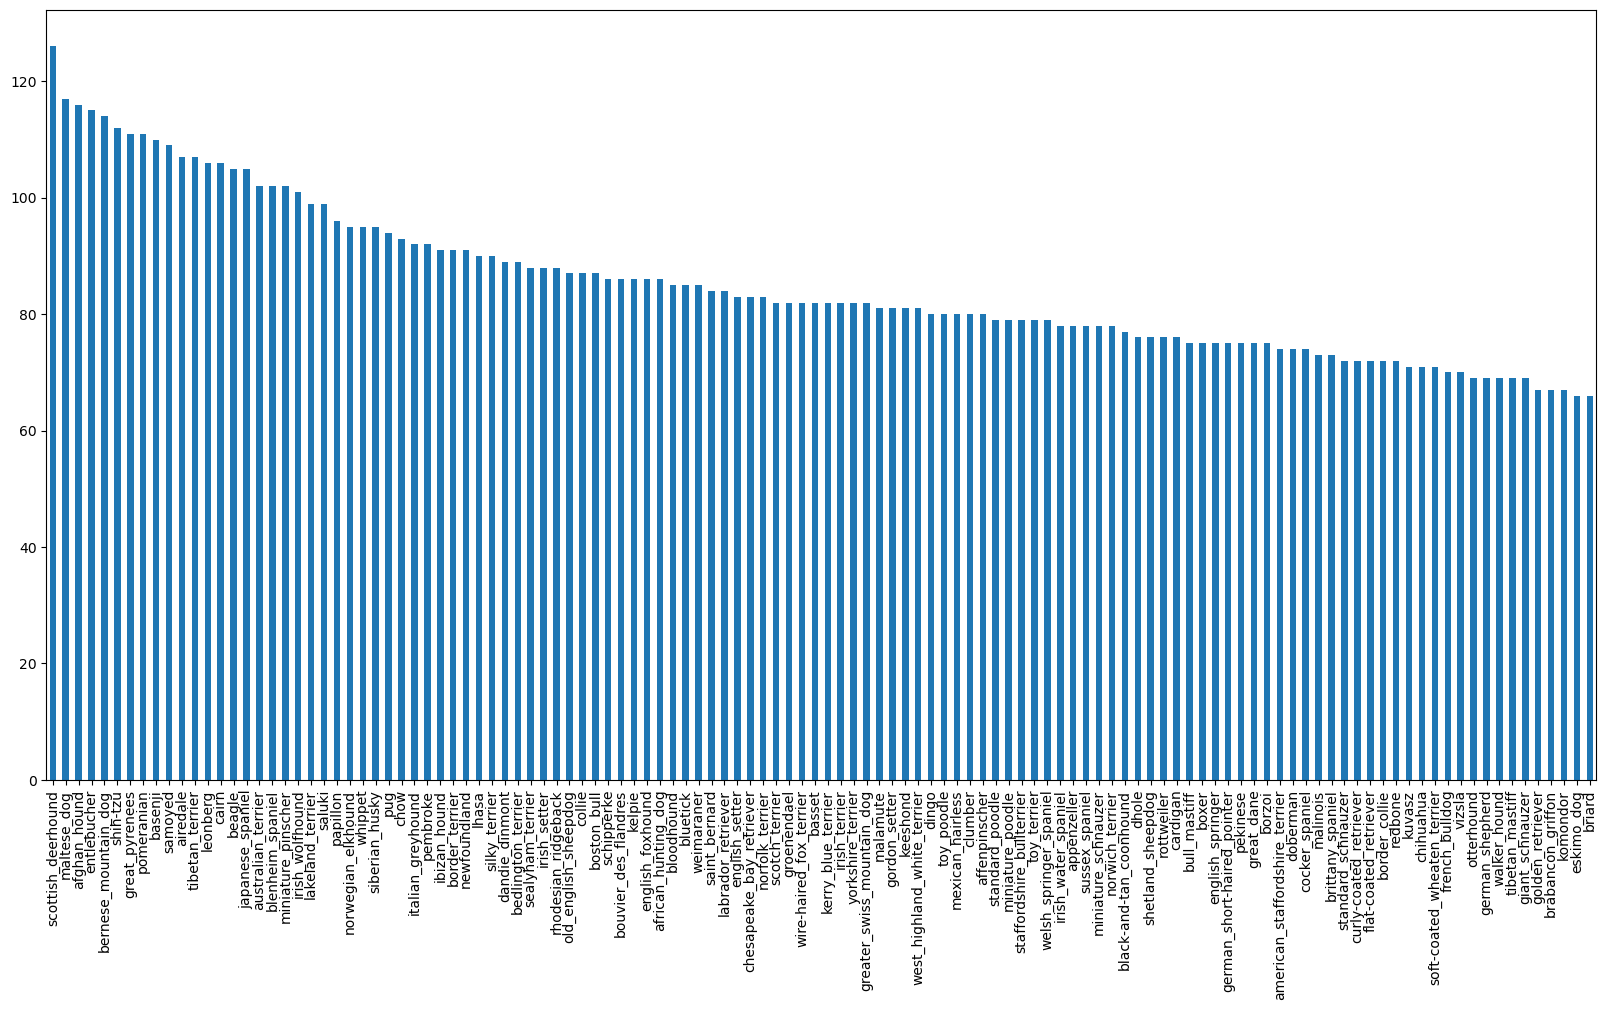

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

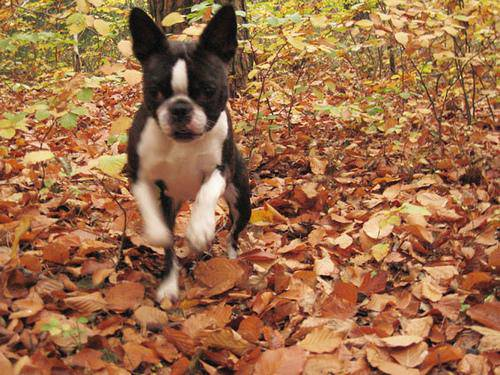

In [5]:
from IPython.display import display, Image
Image("/kaggle/input/dpl-project-1-dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [6]:
train_path = "/kaggle/input/dpl-project-1-dog-breed-identification/train/"
filenames = [train_path + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['/kaggle/input/dpl-project-1-dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
print(len(os.listdir(train_path)))
print(len(filenames))

10222
10222


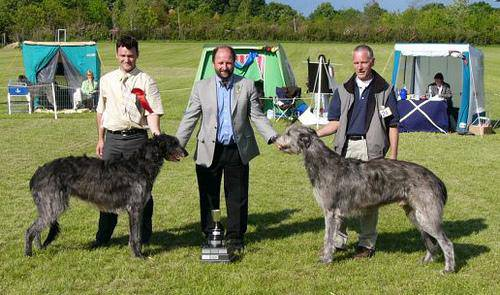

In [8]:
Image(filenames[4567])

In [9]:
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [10]:
print(len(labels))
print(len(filenames))

10222
10222


In [11]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [12]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
X = filenames
y = boolean_labels

print(f"Number of training images: {len(X)}")
print(f"Number of labels: {len(y)}")

Number of training images: 10222
Number of labels: 10222


In [15]:
NUM_IMAGES = 1000

In [16]:
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [17]:
IMG_SIZE = 224
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [18]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [19]:
BATCH_SIZE = 32
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) 
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [20]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [21]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [22]:
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

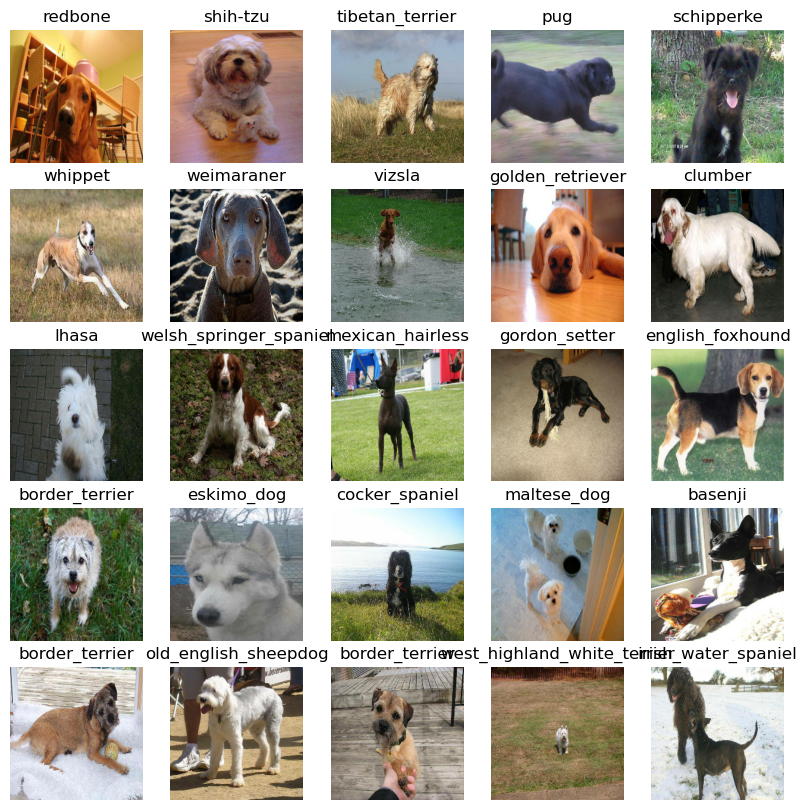

In [23]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [24]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [25]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax")
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
  model.build(INPUT_SHAPE) 
  
  return model

In [26]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [28]:
NUM_EPOCHS = 100

In [29]:
def train_model():
  model = create_model()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[early_stopping])
  
  return model

In [30]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 24s 312ms/step - loss: 4.5429 - accuracy: 0.1175 - val_loss: 3.3668 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 106ms/step - loss: 1.6271 - accuracy: 0.6800 - val_loss: 2.0895 - val_accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 3s 105ms/step - loss: 0.5632 - accuracy: 0.9375 - val_loss: 1.6764 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 3s 108ms/step - loss: 0.2516 - accuracy: 0.9875 - val_loss: 1.5083 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 3s 104ms/step - loss: 0.1465 - accuracy: 0.9987 - val_loss: 1.4228 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 3s 109ms/step - loss: 0.1000 - accuracy: 0.9987 - val_loss: 1.3796 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 3s 105ms/step - loss: 0.0750 - accuracy: 1.0000 - val_loss: 1.3537 - val_accuracy: 0.670

In [31]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 4s 94ms/step


array([[3.6535528e-04, 5.2646741e-05, 9.3884522e-04, ..., 2.6212796e-04,
        8.4875654e-05, 1.1328730e-03],
       [1.8876811e-03, 6.5640751e-03, 1.0351965e-02, ..., 8.5862167e-04,
        2.0587014e-03, 1.2862460e-04],
       [1.2165479e-05, 4.0105653e-05, 1.3448998e-06, ..., 3.2395241e-05,
        3.6902602e-06, 6.1980105e-04],
       ...,
       [5.8778160e-06, 3.7810965e-05, 9.1694157e-05, ..., 1.4086565e-04,
        2.0720725e-04, 1.8160137e-04],
       [1.2354172e-03, 2.5781771e-04, 1.9014935e-04, ..., 5.4186028e-05,
        1.0977460e-04, 4.0588011e-03],
       [7.3322655e-05, 3.4431410e-05, 6.0786854e-04, ..., 5.0876844e-03,
        1.3390693e-03, 9.2423710e-05]], dtype=float32)

In [32]:
predictions.shape

(200, 120)

In [33]:
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}") 
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")

[3.6535528e-04 5.2646741e-05 9.3884522e-04 5.8579815e-05 1.3158223e-04
 1.9555740e-05 3.5604831e-02 1.4943386e-04 5.1965943e-04 7.5367151e-04
 3.5139645e-04 7.5906224e-05 5.4073567e-04 4.9701866e-05 7.5109513e-04
 7.0595409e-04 6.8530382e-05 3.6501024e-02 2.5406251e-05 2.5201183e-05
 3.4890135e-04 1.1207840e-04 3.0819047e-06 5.7762634e-04 2.0415977e-05
 2.4053124e-04 3.8257846e-01 9.0686590e-05 4.0589573e-04 5.4822135e-04
 2.5455764e-04 1.2994058e-03 7.8519690e-04 9.9703366e-06 1.1111291e-04
 7.7903252e-03 5.6326849e-04 4.0869429e-04 1.4766868e-05 2.0147770e-04
 1.2201248e-04 4.3009401e-05 1.3406042e-04 1.6216462e-04 5.0078448e-05
 2.8452947e-05 1.3560704e-05 3.9392008e-04 5.8980059e-04 8.4588544e-05
 3.9448190e-05 3.1806128e-05 6.0460148e-05 1.1377933e-04 2.3173836e-05
 1.2350865e-04 2.9303264e-04 6.3801761e-04 2.3535148e-03 8.9104854e-02
 1.5992371e-03 4.0802432e-05 2.1909811e-03 1.9094901e-05 3.9294304e-04
 2.6075495e-02 5.4816774e-05 2.4895091e-05 6.0930713e-03 3.0091091e-04
 1.722

In [34]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [35]:
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [36]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

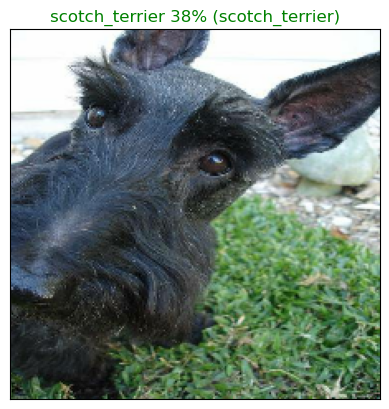

In [37]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [38]:
model.evaluate(val_data)

7/7 [==============================] - 1s 80ms/step - loss: 1.2427 - accuracy: 0.6900


[1.2427326440811157, 0.6899999976158142]

In [39]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [40]:
full_model = create_model()

In [41]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [42]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[ full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 62s 183ms/step - loss: 1.3416 - accuracy: 0.6695
Epoch 2/100
320/320 [==============================] - 27s 86ms/step - loss: 0.4001 - accuracy: 0.8810
Epoch 3/100
320/320 [==============================] - 29s 89ms/step - loss: 0.2427 - accuracy: 0.9318
Epoch 4/100
320/320 [==============================] - 28s 89ms/step - loss: 0.1543 - accuracy: 0.9636
Epoch 5/100
320/320 [==============================] - 27s 84ms/step - loss: 0.1056 - accuracy: 0.9776
Epoch 6/100
320/320 [==============================] - 27s 84ms/step - loss: 0.0785 - accuracy: 0.9859
Epoch 7/100
320/320 [==============================] - 27s 85ms/step - loss: 0.0591 - accuracy: 0.9914
Epoch 8/100
320/320 [==============================] - 27s 85ms/step - loss: 0.0478 - accuracy: 0.9932
Epoch 9/100
320/320 [==============================] - 28s 86ms/step - loss: 0.0367 - accuracy: 0.9970
Epoch 10/100
320/320 [==============================] - 28s 86ms/step - 

In [43]:
test_path = "/kaggle/input/dpl-project-1-dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/kaggle/input/dpl-project-1-dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg',
 '/kaggle/input/dpl-project-1-dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg']

In [44]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [45]:
test_predictions = full_model.predict(test_data,
                                      verbose=1)

324/324 [==============================] - 75s 231ms/step


In [47]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [48]:
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f7a32505c12649183c5991ecfa7d68b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bc6d50ffb4644feb34530aa58943e85b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7cbc041e79135a572aad87904b5c9c57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f3b603f10d6a344f0395fb46b242ff8e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,1.731886e-11,4.936008e-15,2.331890e-11,4.101096e-11,9.304524e-03,1.544542e-12,7.041815e-10,8.388086e-09,3.946931e-13,...,1.056457e-08,1.202645e-08,1.913765e-10,5.772091e-10,7.429022e-13,3.054800e-14,9.821074e-10,1.926474e-07,1.882033e-10,4.499381e-11
1,f7a32505c12649183c5991ecfa7d68b3,2.510576e-15,4.025932e-11,3.342596e-15,3.149559e-13,4.876696e-11,8.916533e-11,2.377447e-10,9.922762e-11,5.199354e-10,...,9.862185e-13,5.402710e-14,1.327207e-07,5.444380e-09,3.712107e-13,7.175703e-14,1.384638e-15,1.875522e-10,1.794182e-13,5.299442e-15
2,bc6d50ffb4644feb34530aa58943e85b,3.558095e-11,2.054527e-05,5.239597e-09,2.711961e-08,3.075416e-09,3.116446e-11,5.255834e-12,5.803869e-12,1.895933e-10,...,9.015856e-12,5.152022e-13,8.402924e-14,2.642834e-09,2.297693e-09,2.961904e-10,9.125186e-14,2.980147e-09,2.139252e-13,2.717506e-12
3,7cbc041e79135a572aad87904b5c9c57,2.529316e-11,3.122754e-14,5.341067e-15,3.495063e-11,1.694772e-07,2.065954e-08,1.151234e-10,8.472423e-12,2.430519e-14,...,3.149497e-11,1.053699e-09,3.504849e-11,6.584848e-13,2.286246e-05,4.569923e-14,2.442398e-13,4.050490e-06,1.084856e-10,1.489852e-11
4,f3b603f10d6a344f0395fb46b242ff8e,5.002387e-15,1.681264e-13,2.666464e-15,6.904974e-11,3.846571e-14,1.069555e-10,3.257573e-12,3.088121e-13,1.418639e-10,...,1.056850e-14,7.302810e-14,3.931025e-12,9.617015e-13,3.447201e-15,9.999985e-01,5.796117e-13,7.272324e-15,6.006517e-15,1.665916e-14


In [50]:
preds_df.to_csv("output.csv",
                 index=False)